In [1]:
import nltk
import pandas as pd
import string
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [2]:
# import the Fake.csv and True.csv files
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [ ]:
fake.head()

In [ ]:
true.head()

In [ ]:
true.info()

In [ ]:
true.text.value_counts()

In [3]:
true_string = ''.join(true["text"])
true_tokenized = nltk.word_tokenize(true_string)

In [4]:
true_tokenized = [word.lower() for word in true_tokenized if word.isalpha()]

In [5]:
fdist_true = FreqDist(true_tokenized)
print(fdist_true.most_common(100))

[('the', 482174), ('to', 245124), ('of', 204957), ('a', 197860), ('and', 181686), ('in', 180668), ('on', 108342), ('s', 99899), ('said', 99024), ('that', 88095), ('for', 79728), ('is', 55428), ('with', 54485), ('he', 54368), ('trump', 54238), ('it', 49335), ('was', 47940), ('by', 47637), ('as', 47307), ('has', 46242), ('from', 39376), ('his', 38016), ('not', 37589), ('have', 36413), ('be', 34291), ('at', 33164), ('an', 32710), ('would', 31524), ('reuters', 28412), ('who', 27642), ('but', 26596), ('president', 26386), ('are', 26125), ('had', 25672), ('will', 25238), ('we', 22163), ('they', 22064), ('its', 21319), ('this', 21019), ('which', 20809), ('state', 19726), ('been', 19598), ('after', 19375), ('were', 18916), ('government', 18285), ('about', 17422), ('more', 17192), ('i', 17020), ('their', 16826), ('new', 16743), ('house', 16513), ('states', 16506), ('also', 15946), ('united', 15575), ('republican', 15346), ('people', 15126), ('or', 15107), ('told', 14244), ('over', 13839), ('cou

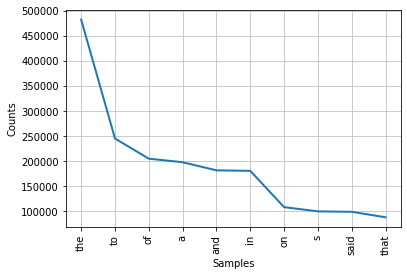

<Figure size 432x288 with 0 Axes>

In [6]:
fdist_true.plot(10,cumulative=False)
plt.savefig('true_freq.png', dpi=100)
plt.show()


In [4]:
fake_string = ''.join(fake["text"])
fake_tokenized = nltk.word_tokenize(fake_string)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(true['text'])

In [10]:
print(text_counts)

  (0, 64092)	2
  (0, 50575)	1
  (0, 27183)	1
  (0, 14368)	3
  (0, 50173)	6
  (0, 21787)	1
  (0, 61380)	4
  (0, 51847)	9
  (0, 14279)	2
  (0, 63697)	3
  (0, 39572)	1
  (0, 28553)	1
  (0, 21451)	1
  (0, 40778)	2
  (0, 16423)	3
  (0, 44680)	3
  (0, 58918)	8
  (0, 15830)	3
  (0, 11011)	1
  (0, 22816)	3
  (0, 57767)	2
  (0, 62616)	1
  (0, 10401)	5
  (0, 50410)	1
  (0, 977)	3
  :	:
  (21416, 14260)	1
  (21416, 39298)	1
  (21416, 31499)	2
  (21416, 58969)	1
  (21416, 57970)	1
  (21416, 3807)	1
  (21416, 22681)	1
  (21416, 13825)	3
  (21416, 16650)	1
  (21416, 29754)	3
  (21416, 3143)	1
  (21416, 47534)	1
  (21416, 2075)	1
  (21416, 51432)	1
  (21416, 31158)	1
  (21416, 57407)	1
  (21416, 57678)	1
  (21416, 1846)	1
  (21416, 51821)	1
  (21416, 51820)	1
  (21416, 57651)	1
  (21416, 20434)	1
  (21416, 36039)	1
  (21416, 45188)	1
  (21416, 45003)	1


In [4]:
# Clean the csv text data
true_word = []	
for i in true["text"]:
	true_word.append(nltk.word_tokenize(i.translate(string.punctuation)))



In [6]:
fake_word = []
for i in fake["text"]:
	fake_word.append(nltk.word_tokenize(i.translate(string.punctuation)))

In [5]:
from nltk.probability import FreqDist
fdist_true = FreqDist(true_tokenized)
fdist_fake = FreqDist(fake_tokenized)
print(fdist_true)
print(fdist_true.most_common(100))
print(fdist_fake)
print(fdist_fake.most_common(100))

<FreqDist with 100790 samples and 9319418 outcomes>
[('the', 423510), (',', 406264), ('.', 311664), ('to', 244387), ('of', 204603), ('a', 188094), ('and', 179988), ('in', 170291), ('on', 105346), ('s', 99647), ('said', 99008), ('that', 84930), ('for', 78200), ('’', 70768), ('The', 58563), ('is', 55086), ('Trump', 54202), ('“', 54140), ('”', 53861), ('with', 53304), ('was', 47910), ('by', 47000), ('has', 46220), ('as', 45269), ('he', 44217), ('from', 39079), ('it', 38644), ('not', 37300), ('U.S.', 36966), ('have', 36393), ('his', 36257), (')', 35408), ('(', 35393), ('be', 34252), ('would', 31481), ('an', 31388), ('-', 31067), ('at', 30994), ('Reuters', 28363), ('who', 27438), ('are', 26048), ('had', 25646), ('will', 25095), ('its', 20972), ('which', 20792), ('been', 19597), ('were', 18892), ('they', 18344), ('but', 18250), ('after', 17896), ('government', 17589), ('President', 17409), ('I', 17001), ('about', 16990), ('this', 16847), ('their', 16504), ('more', 16234), ('also', 15744), ('

In [ ]:

for w in true["text"]:
	print(w, end="")
# true = nltk.word_tokenize(true["text"][0])

In [ ]:
tex